## 欠拟合、过拟合

In [92]:
%matplotlib inline
import torch
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

In [93]:
train_n , test_n, w_true, b_true = 100,100,[1.2,-3.4,5.6],5

In [94]:
features = torch.randn((train_n+test_n,1))
poly_features = torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1)

In [95]:
#真实标签
labels = w_true[0]*poly_features[:,0]+w_true[1]*poly_features[:,1]+w_true[2]*poly_features[:,2]+b_true

In [96]:
type(labels)

torch.Tensor

In [97]:
#加入噪声
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [98]:
features[:2], poly_features[:2], labels[:2]


(tensor([[-1.4462e-04],
         [-4.6866e-01]]),
 tensor([[-1.4462e-04,  2.0914e-08, -3.0244e-12],
         [-4.6866e-01,  2.1965e-01, -1.0294e-01]]),
 tensor([4.9780, 3.1064]))

In [99]:
def set_figsize(figsize=(3.5,2.5)):
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize
# 保存在3.11
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)


In [100]:
epochs , loss = 100, torch.nn.MSELoss()

In [101]:
def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net = torch.nn.Linear(train_features.shape[-1],1)#权重有shape[-1]个feature
    print("Parameters size:",train_features.shape[-1])
    batch = min(10,train_labels.shape[0])#shape[0]训练集的样本数
    dataset = torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter = torch.utils.data.DataLoader(dataset,batch,shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
    train_ls,test_ls=[],[]
    for _ in range(epochs):
        for X,y in train_iter:
            l=loss(net(X),y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            
        train_labels=train_labels.view(-1,1)
        test_labels=test_labels.view(-1,1)#行向量转为列向量
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
    
    print("final epoch: train loss: ",train_ls[-1],"test loss:",test_ls[-1])
    semilogy(range(1,epochs+1),train_ls,"epochs","loss",
            range(1,epochs+1),test_ls,["trains","test"])
    
    print("weight: ",net.weight.data,"\nbias: ",net.bias.data)

Parameters size: 3
final epoch: train loss:  9.832662180997431e-05 test loss: 9.882323502097279e-05
weight:  tensor([[ 1.1975, -3.3995,  5.6007]]) 
bias:  tensor([5.0010])


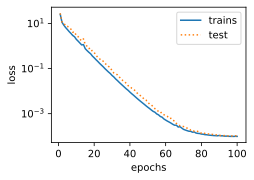

In [102]:
fit_and_plot(poly_features[:train_n,:],poly_features[train_n:,:],labels[:train_n],labels[train_n:])

Parameters size: 1
final epoch: train loss:  181.3951416015625 test loss: 141.05191040039062
weight:  tensor([[17.1843]]) 
bias:  tensor([-0.1821])


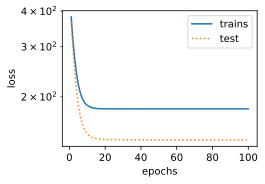

In [103]:
fit_and_plot(features[:train_n,:],features[train_n:,:],labels[:train_n],labels[train_n:])#欠拟合，此时参数只有一个，无法拟合(labels是通过三次函数计算出来的)

In [104]:
features.shape

torch.Size([200, 1])

In [105]:
poly_features[:train_n,:].shape[-1]

3

In [106]:
features[:train_n,:].shape[-1]

1

In [107]:
labels.shape

torch.Size([200])

In [108]:
features.shape

torch.Size([200, 1])

Parameters size: 3
final epoch: train loss:  1.5592790842056274 test loss: 569.8533325195312
weight:  tensor([[-0.6686,  0.2053, -0.4276]]) 
bias:  tensor([3.3246])


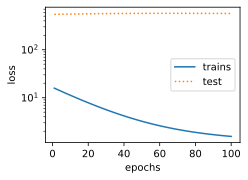

In [109]:
fit_and_plot(poly_features[0:2,:],poly_features[train_n:,:],labels[0:2],labels[train_n:])